- Group Team Members:
 - Subrata Singha
 - Abhishek Gaur 
 - Akul Mathad



### Problem Statement: (Lead Score Case Study)
    
X Education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert 
into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads 
such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a 
lower conversion chance.The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Objective:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used 
by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert 
whereas a lower score would mean that the lead is cold and will mostly not get converted.

## 1) Importing Necessary Libraries:

In [799]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2) Importing the dataset and Basic Checks:

In [800]:
data=pd.read_csv('Leads.csv')

In [801]:
### changing pandas display options to display the dataset

pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

In [802]:
### Checking the basics columns and view of the dataset
data.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [803]:
### Shape of the dataset
data.shape

(9240, 37)

#### Remarks: There are 9240 rows and 37 columns in the dataset

In [804]:
### Checking the data types and other basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Remarks: Some columns have null values. It seems that there is no obvious issue with the data type.

In [805]:
### Checking the numerical variable
data.describe(percentiles=[0.25,0.5,0.6,0.75,0.9,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
60%,624689.200000,0.000000,3.000000,372.000000,2.500000,15.000000,17.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000


#### Remarks: Total visits and Page views per visit seems to have outliers. Conversion rate is around 38 %.

In [806]:
### Checking for Duplicates
data.duplicated(keep='first').sum()

0

#### Remarks: It seems there are no duplicate rows.

In [807]:
sum(data.duplicated(subset='Prospect ID'))==0

True

In [808]:
### Making a copy of the dataset for further processes
data_use=data.copy()


## 3) Data Cleaning:

In [809]:
data_use.shape

(9240, 37)

In [810]:
## Counting the percentage of 'Select' value for each column in the dataset:
round(data_use.eq('Select').mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                   21.02
How did you hear about X Education               54.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [811]:
### Ceratin entries are filled with Select. These are equivalent to Null values because the visitor did not select any option

data_use.replace('Select',np.NaN,inplace=True)

In [812]:
## Verifying the change:
data_use.eq('Select').sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [813]:
### Checking for Null Values interms of percentage
round(100*data_use.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [814]:
### Removing columns with null values more than 45 %

drop_cols=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
data_use.drop(drop_cols,axis=1,inplace=True)

In [815]:
data_use.shape

(9240, 30)

In [816]:
round(100*data_use.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [817]:
### Checking the dataset with one unique entries and those wont have any effect on the modelling

for column in data_use.columns:
    unique_values = len(data_use[column].unique())
    print(f"Column: {column}, Unique Values: {unique_values}")

Column: Prospect ID, Unique Values: 9240
Column: Lead Number, Unique Values: 9240
Column: Lead Origin, Unique Values: 5
Column: Lead Source, Unique Values: 22
Column: Do Not Email, Unique Values: 2
Column: Do Not Call, Unique Values: 2
Column: Converted, Unique Values: 2
Column: TotalVisits, Unique Values: 42
Column: Total Time Spent on Website, Unique Values: 1731
Column: Page Views Per Visit, Unique Values: 115
Column: Last Activity, Unique Values: 18
Column: Country, Unique Values: 39
Column: Specialization, Unique Values: 19
Column: What is your current occupation, Unique Values: 7
Column: What matters most to you in choosing a course, Unique Values: 4
Column: Search, Unique Values: 2
Column: Magazine, Unique Values: 1
Column: Newspaper Article, Unique Values: 2
Column: X Education Forums, Unique Values: 2
Column: Newspaper, Unique Values: 2
Column: Digital Advertisement, Unique Values: 2
Column: Through Recommendations, Unique Values: 2
Column: Receive More Updates About Our Cours

In [818]:
columns_to_check = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                   'Get updates on DM Content', 'I agree to pay the amount through cheque']

for column in columns_to_check:
    print(f"Column: {column}")
    print(data_use[column].value_counts(dropna=False))
    print()

Column: Magazine
No    9240
Name: Magazine, dtype: int64

Column: Receive More Updates About Our Courses
No    9240
Name: Receive More Updates About Our Courses, dtype: int64

Column: Update me on Supply Chain Content
No    9240
Name: Update me on Supply Chain Content, dtype: int64

Column: Get updates on DM Content
No    9240
Name: Get updates on DM Content, dtype: int64

Column: I agree to pay the amount through cheque
No    9240
Name: I agree to pay the amount through cheque, dtype: int64



In [819]:
### We can drop these columns 

data_use.drop(columns_to_check,axis=1,inplace=True)

In [820]:
data_use.shape

(9240, 25)

In [821]:
round(100*data_use.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [822]:
### Checking columns with large missing values still left in the dataset

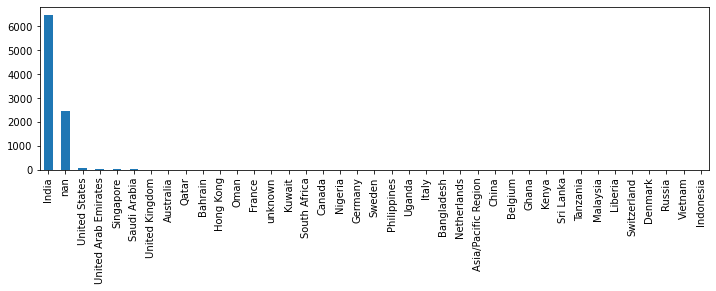

In [823]:
### Country

plt.figure(figsize=[12,3])
data_use.Country.value_counts(dropna=False).plot.bar()
plt.show()

In [824]:
### Country is mostly India or Null. 

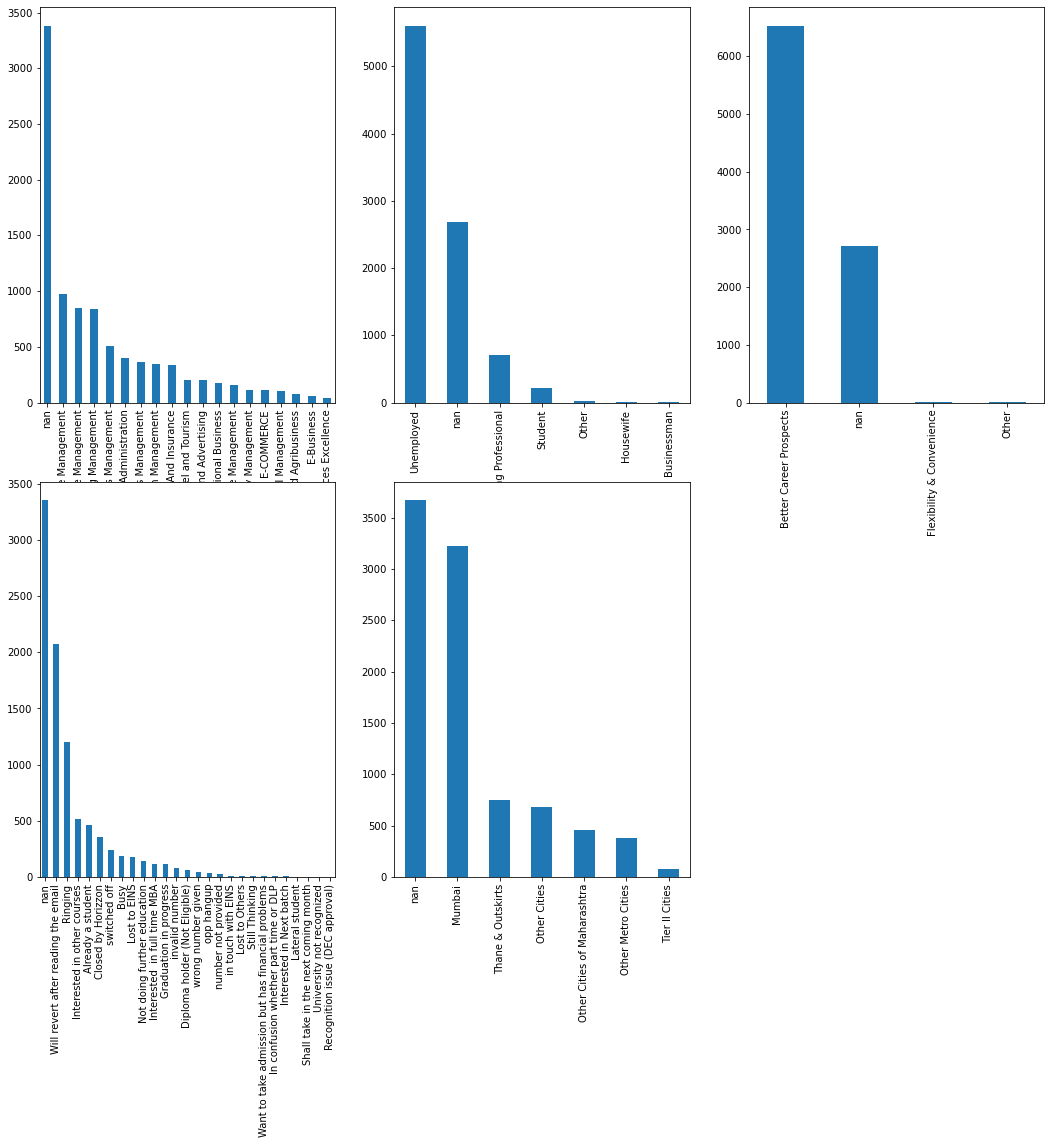

In [825]:
plt.figure(figsize=[18,16])

plt.subplot(2,3,1)
data_use.Specialization.value_counts(dropna=False).plot.bar()

plt.subplot(2,3,2)
data_use['What is your current occupation'].value_counts(dropna=False).plot.bar()

plt.subplot(2,3,3)
data_use['What matters most to you in choosing a course'].value_counts(dropna=False).plot.bar()

plt.subplot(2,3,4)
data_use['Tags'].value_counts(dropna=False).plot.bar()

plt.subplot(2,3,5)
data_use['City'].value_counts(dropna=False).plot.bar()



plt.show()

In [826]:
### For all the above columns we can mention the null values as not specified

data_use[['Country','Specialization','What is your current occupation', 'What matters most to you in choosing a course',
         'Tags','City']]=data_use[['Country','Specialization','What is your current occupation', 'What matters most to you in choosing a course',
         'Tags','City']].fillna('Not Specified')

In [827]:
### For Country we can create three categories: India, Outside India and Not Specified
### For City We can create three categories viz. Mumbai,Outside Mumbai and Not Specfied

data_use['Country']=data_use.Country.apply(lambda x: 'India' if x=='India' else('Not Specified' if x=='Not Specified' else 'Outside India'))
data_use['City']=data_use.City.apply(lambda x: 'Mumbai' if x=='Mumbai' else('Not Specified' if x=='Not Specified' else 'Outside Mumbai'))

In [828]:
print(data_use.Country.value_counts(normalize=True)*100)
print(data_use.City.value_counts(normalize=True)*100)

India            70.259740
Not Specified    26.634199
Outside India     3.106061
Name: Country, dtype: float64
Not Specified     39.707792
Mumbai            34.870130
Outside Mumbai    25.422078
Name: City, dtype: float64


In [829]:
### Specialization
round(data_use.Specialization.value_counts(normalize=True)*100,2)

Not Specified                        36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [830]:
### Lets create a Specializtion column after forming few groups
### Keeping the original Specialization intact if required can be used in future

data_use['Specialization_org']=data_use['Specialization'] 

In [831]:
data_use['Specialization']=data_use.Specialization.replace(['Finance Management','Human Resource Management','Marketing Management',
                                                           'Operations Management','IT Projects Management','Supply Chain Management'
                                                           ,'Healthcare Management','Hospitality Management','Retail Management'],'Management_Specialization')

In [832]:
data_use['Specialization']=data_use.Specialization.replace(['International Business','Rural and Agribusiness','E-Business']
                                                          , 'Business_Specialization')

In [833]:
### What is your current occupation
print(data_use['What is your current occupation'].value_counts())

Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [834]:
### Combining Other, Businessman and Housewife to create a other group for being very less number of entries
### renaming the column to Occupation

data_use.rename(columns={'What is your current occupation':'Occupation'},inplace=True)
data_use.Occupation.replace(['Housewife','Businessman'],'Other',inplace=True)

In [835]:
print(data_use.Occupation.value_counts())

Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     34
Name: Occupation, dtype: int64


In [836]:
#### What matters to you most in choosing course

round(data_use['What matters most to you in choosing a course'].value_counts(normalize=True)*100,2)

Better Career Prospects      70.65
Not Specified                29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [837]:
### There are hardly any other entries
### combining Flexibility & Convenience with Other
### Renaming the column to matters_most

data_use.rename(columns={'What matters most to you in choosing a course':'matters_most'},inplace=True)
data_use.matters_most.replace(['Flexibility & Convenience'],'Other',inplace=True)

In [838]:
### Let's create a list of potential columns that can be removed at a later stage if required
### In these columns a particular entry is pre-dominant
pot_col_drop=['matters_most','Country']

In [839]:
### Tags Column

round(100*(data_use.Tags.value_counts(normalize=True)),2)

Not Specified                                        36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [840]:
#### Merging the low frequency tags to a tag called others

data_use.Tags.replace(['Recognition issue (DEC approval','Shall take in the next coming month','University not recognized'
                      ,'Lateral student','Interested in Next batch','In confusion whether part time or DLP',
                      'Want to take admission but has financial problems','Still Thinking','Lost to Others','in touch with EINS'
                      ,'number not provided','opp hangup','wrong number given','Diploma holder (Not Eligible)','invalid number'
                      'Graduation in progress','Interested  in full time MBA','Not doing further education','Lost to EINS',
                      'Busy','switched off'],'Others',inplace=True)



In [841]:
round(data_use.Tags.value_counts(normalize=True)*100,2)

Not Specified                          36.29
Will revert after reading the email    22.42
Ringing                                13.02
Others                                 11.70
Interested in other courses             5.55
Already a student                       5.03
Closed by Horizzon                      3.87
Graduation in progress                  1.20
invalid number                          0.90
Recognition issue (DEC approval)        0.01
Name: Tags, dtype: float64

In [842]:
round(data_use.isnull().mean()*100,2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
Occupation                                0.00
matters_most                              0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags         

In [843]:
### Lead Source Column
round(data_use['Lead Source'].value_counts(dropna=False,normalize=True)*100,2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
NaN                   0.39
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

In [844]:
### We can convert google to Google
### We can add social media to Facebook
###  we can combine all the low frequncy columns to a column named others
### We can replace null columns with mode i.e. Google

data_use['Lead Source'].replace(['google',np.NaN],'Google',inplace=True)
data_use['Lead Source'].replace(['Social Media'], 'Facebook',inplace=True)
data_use['Lead Source'].replace(['blog','Pay per Click Ads','NC_EDM','testone','welearnblog_Home','WeLearn','youtubechannel'
                                ,'Press_Release','Live Chat','Click2call','bing'],'Others',inplace=True)

In [845]:
data_use['Lead Source'].value_counts(dropna=False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              57
Others                21
Name: Lead Source, dtype: int64

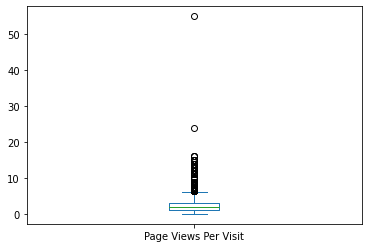

In [846]:
data_use['Page Views Per Visit'].plot.box()
plt.show()

In [847]:
data_use['Page Views Per Visit'].value_counts(dropna=False)

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
NaN       137
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
4.33        9
14.00       9
2.80        9
2.20        9
1.60        8
2.17        8
3.25        8
2.40        6
13.00       6
1.20        5
12.00       5
1.43        4
3.40        4
2.60        4
1.71        4
1.83        4
15.00       4
1.38        3
4.25        3
4.75        3
1.57        3
16.00       3
5.67        3
1.78        3
1.56        2
5.40        2
2.71        2
2.83        2
1.23        2
1.22        2
3.60        2
3.75        2
7.50        2
1.14        2
2.22        2
5.25        2
5.33        2
2.09        2
3.20        2
4.17        1
2.57  

In [848]:
### Since Outliers are present in this column we will replace this with median values
data_use['Page Views Per Visit'].replace(np.NaN,data_use['Page Views Per Visit'].median(),inplace=True)

In [849]:
data_use['Page Views Per Visit'].value_counts(dropna=False)

0.00     2189
2.00     1932
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

In [850]:
#### Last Activity

data_use['Last Activity'].value_counts(dropna=False,normalize=True)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [851]:
### We can replace Null entries with Email opened as it is mode
data_use['Last Activity'].replace(np.NaN,'Email Opened',inplace=True)
### We can combine low frequency entries as others
data_use['Last Activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow','Email Marked Spam','Email Received'
                                  ,'View in browser link Clicked','Approached upfront','Had a Phone Conversation',
                                  'Unsubscribed'], 'Others',inplace=True)

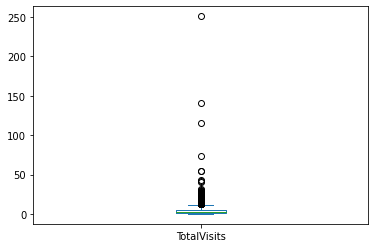

In [852]:
### Total Visits
data_use['TotalVisits'].plot.box()
plt.show()

In [853]:
data_use['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [854]:
### As there are outliers in the dataset hence null values can be replaced with Median value
data_use['TotalVisits'].replace(np.NaN,data_use['TotalVisits'].median(),inplace=True)

In [855]:
data_use['TotalVisits'].sum()

31773.0

In [856]:
print(data_use.isnull().sum())

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
Occupation                                0
matters_most                              0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
City                            

#### Remarks: Missing value treatment is completed. Now let us scroll through others columns as well

In [857]:
print(data_use['Lead Origin'].value_counts())

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


In [858]:
print(data_use['Do Not Email'].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64


In [859]:
print(data_use['Do Not Call'].value_counts())
### We can drop this column as max inputs are No only
data_use.drop('Do Not Call',axis=1,inplace=True)

No     9238
Yes       2
Name: Do Not Call, dtype: int64


In [860]:
print(data_use['Search'].value_counts())
### We can drop this column as max inputs are No only
data_use.drop('Search',axis=1,inplace=True)

No     9226
Yes      14
Name: Search, dtype: int64


In [861]:
print(data_use['Newspaper Article'].value_counts())
### We can drop this column as max inputs are No only
data_use.drop('Newspaper Article',axis=1,inplace=True)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64


In [862]:
print(data_use['X Education Forums'].value_counts())
### We can drop this column as max inputs are No only
data_use.drop('X Education Forums',axis=1,inplace=True)

No     9239
Yes       1
Name: X Education Forums, dtype: int64


In [863]:
print(data_use['Newspaper'].value_counts())
### We can drop this column as max inputs are No only
data_use.drop('Newspaper',axis=1,inplace=True)

No     9239
Yes       1
Name: Newspaper, dtype: int64


In [864]:
print(data_use['Digital Advertisement'].value_counts())
### We can drop this column as max inputs are No only
data_use.drop('Digital Advertisement',axis=1,inplace=True)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


In [865]:
print(data_use['Through Recommendations'].value_counts())
### We can drop this column as max inputs are No only
data_use.drop('Through Recommendations',axis=1,inplace=True)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64


In [866]:
print(data_use['A free copy of Mastering The Interview'].value_counts())

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [867]:
print(data_use['Last Notable Activity'].value_counts(normalize=True))

### We can club low frequency columns to other
data_use['Last Notable Activity'].replace(['Form Submitted on Website','Approached upfront','Email Received','Resubscribed to emails'
                                          ,'View in browser link Clicked','Email Marked Spam','Had a Phone Conversation','Unreachable'
                                          ,'Unsubscribed','Email Bounced',], 'Others',inplace=True)



Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64


In [868]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Country                                 9240 non-null   obje

In [869]:
### Removing potential columns added earlier and Specialization org for further analysis
pot_col_drop.append('Specialization_org')

In [870]:
df_clean=data_use.drop(pot_col_drop,axis=1)

In [871]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

In [872]:
#### Percentage of rows dropped from the original dataset

print(len(df_clean)/len(data))

1.0


In [873]:
print(data.shape)
print(df_clean.shape)

(9240, 37)
(9240, 16)


##### Remarks: So no row was removed in the cleaning and number of columns has been reduced to 16 from 37.

In [874]:
### Imbalance Factor of Target Variable
print(round(100*df_clean.Converted.mean(),2))

### Conversion rate is 38 % for the dataset

38.54


## 4) Univariate and Bivariate Analaysis:

In [875]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

### 4.1) Categorical Variable:

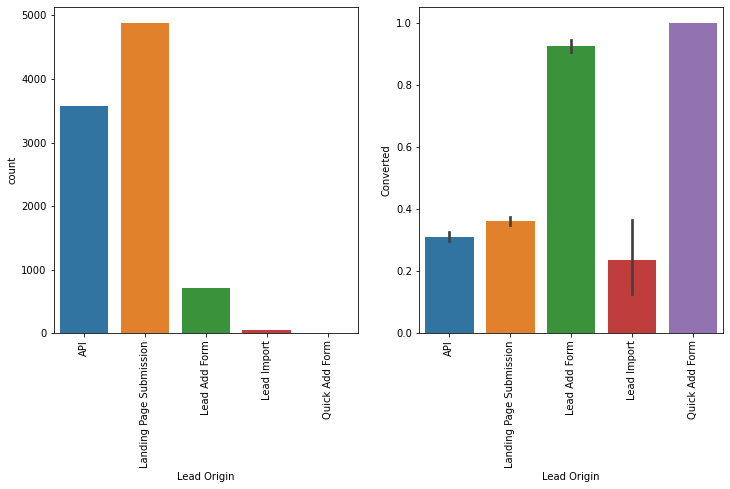

In [876]:
### Lead Origin

plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
sns.countplot(df_clean['Lead Origin'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_clean,x='Lead Origin',y='Converted')
plt.xticks(rotation=90)

plt.show()

#### Remarks: Maximum entry is from Landing Page Submission however, conversion rate is very high for Lead Add Form almost 90%.

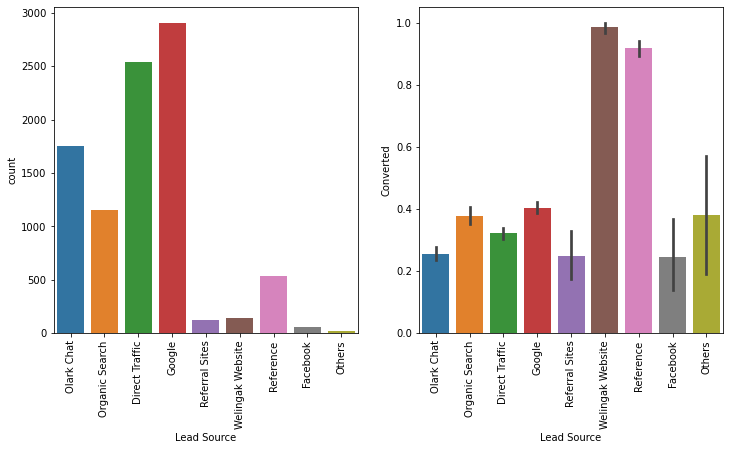

In [877]:
### Lead Source
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
sns.countplot(df_clean['Lead Source'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_clean,x='Lead Source',y='Converted')
plt.xticks(rotation=90)

plt.show()


#### Remarks: Maximum Lead source is from Google. However, the conversion rate of Google is 40 %. For Refrence and Welingak website the conversion rate is very high.

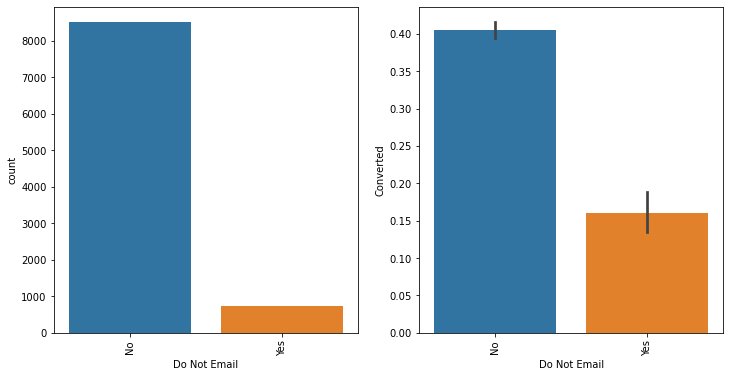

In [878]:
### Do Not Email
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
sns.countplot(df_clean['Do Not Email'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_clean,x='Do Not Email',y='Converted')
plt.xticks(rotation=90)

plt.show()


#### Remarks: This variable shows very similar behaviour in the countplot and rate of conversion.

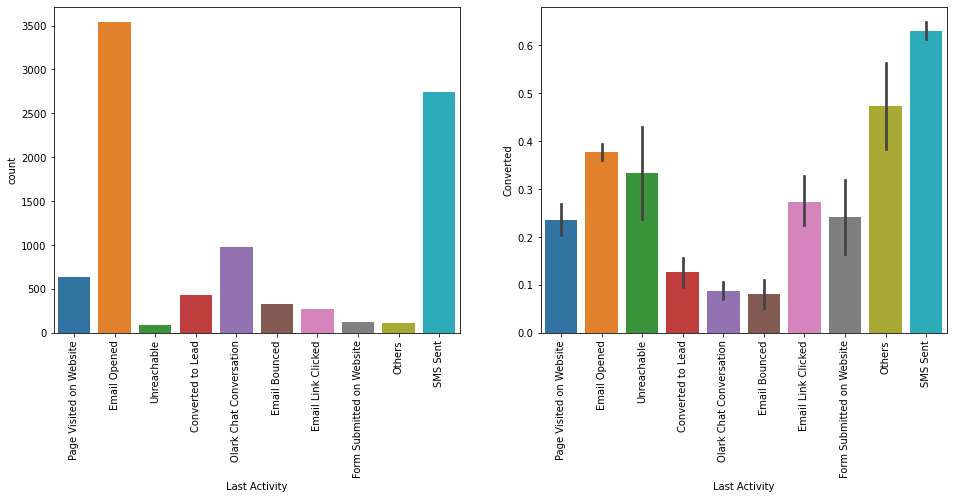

In [879]:
### Last Activity
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.countplot(df_clean['Last Activity'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_clean,x='Last Activity',y='Converted')
plt.xticks(rotation=90)

plt.show()


#### Remarks: For most of the leads last activity is Email Openend. However, the conversion rate is maximum for the leads whose last activity is SMS Sent.

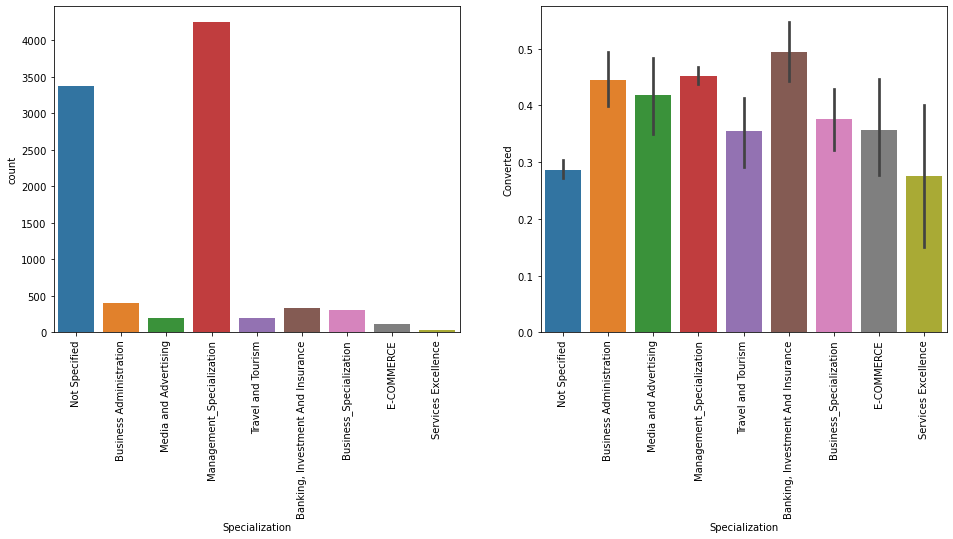

In [880]:
### Specialization
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.countplot(df_clean['Specialization'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_clean,x='Specialization',y='Converted')
plt.xticks(rotation=90)

plt.show()


#### Remarks: Maximum has mentioned Management Specilization. Conversion rate for this specialization is also very good (45%). Maximum conversion rate is for Banking, Investment and Insurance Specialization.

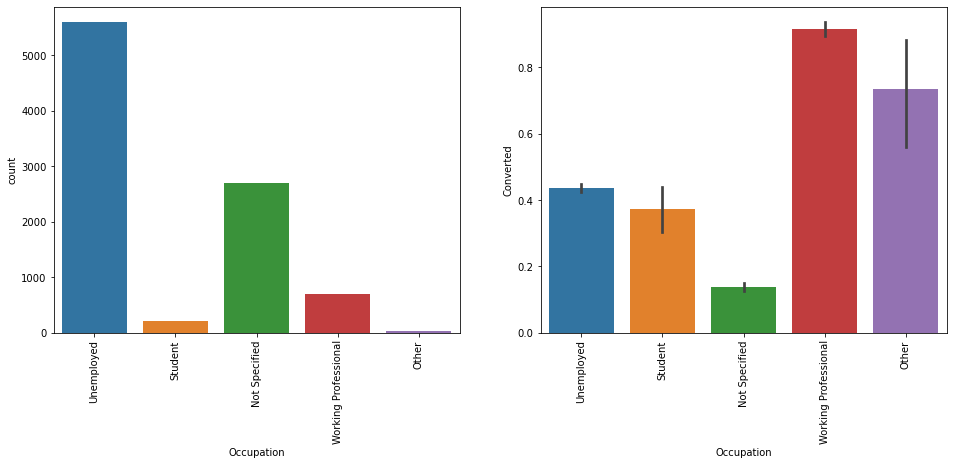

In [881]:
### Occupation
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.countplot(df_clean['Occupation'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_clean,x='Occupation',y='Converted')
plt.xticks(rotation=90)

plt.show()


#### Remarks: Maximum has mentioned  Unemployed as occupation. Conversion rate of working professional is very high. 

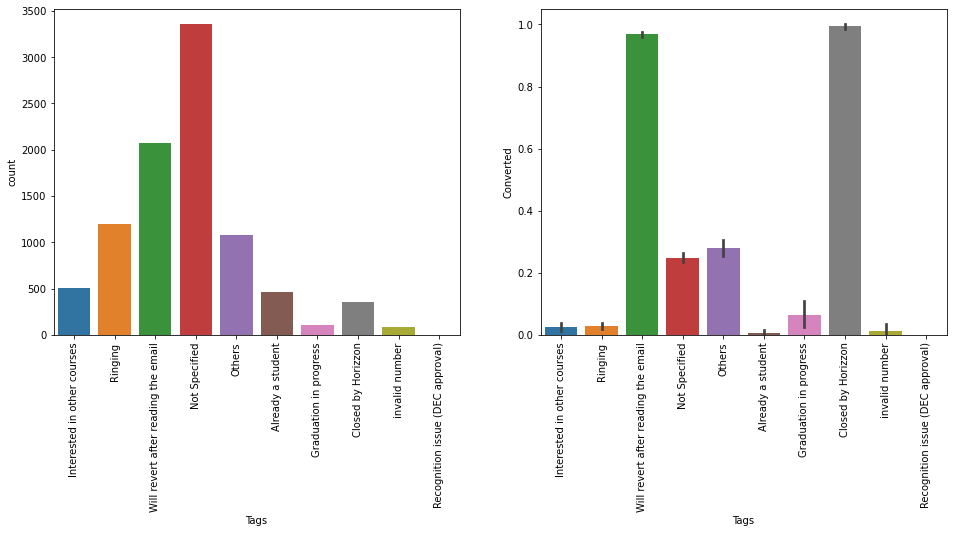

In [882]:
### Tags
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.countplot(df_clean['Tags'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_clean,x='Tags',y='Converted')
plt.xticks(rotation=90)

plt.show()


#### Remarks: Will revert after reading the email has good numbers as entry and conversion rate as well. For maximum case Tags has not been specified. Also for Closed by Horizon has the highest conversion rate.

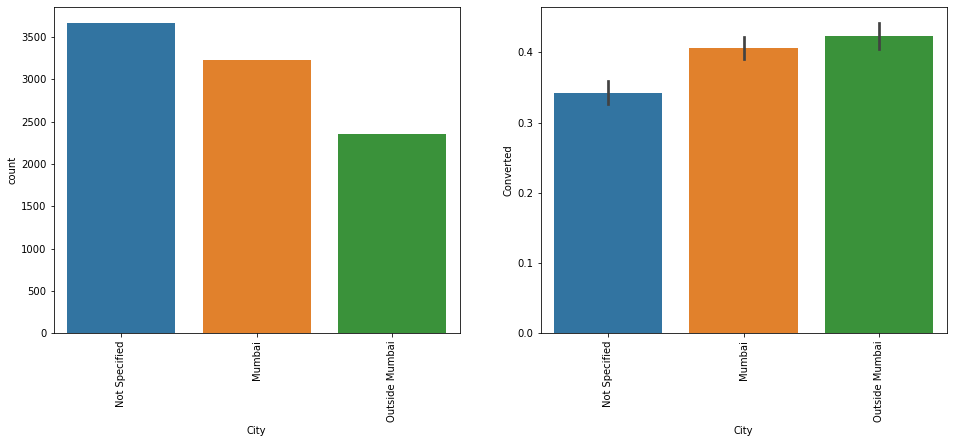

In [883]:
### City
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.countplot(df_clean['City'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_clean,x='City',y='Converted')
plt.xticks(rotation=90)

plt.show()


#### Remarks: Outside Mumbai has better conversion rate.

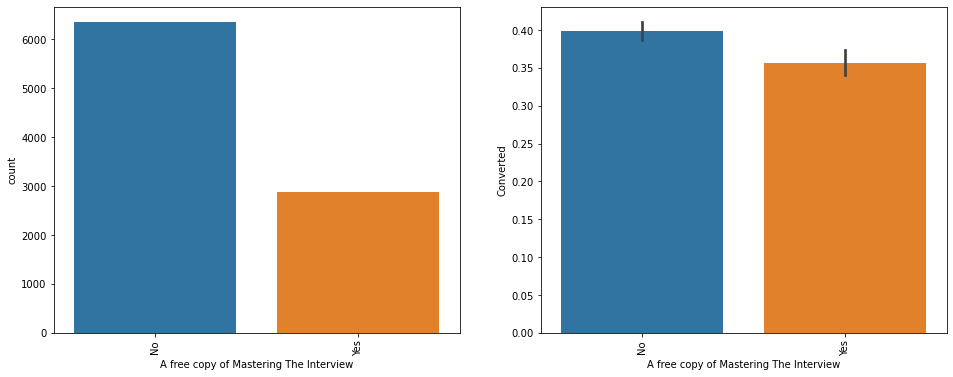

In [884]:
### A free copy of mastering the interview
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.countplot(df_clean['A free copy of Mastering The Interview'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_clean,x='A free copy of Mastering The Interview',y='Converted')
plt.xticks(rotation=90)

plt.show()


#### Remarks: Although No has the maximum entry in this column. Conversion rate for No is slightly better than Yes.

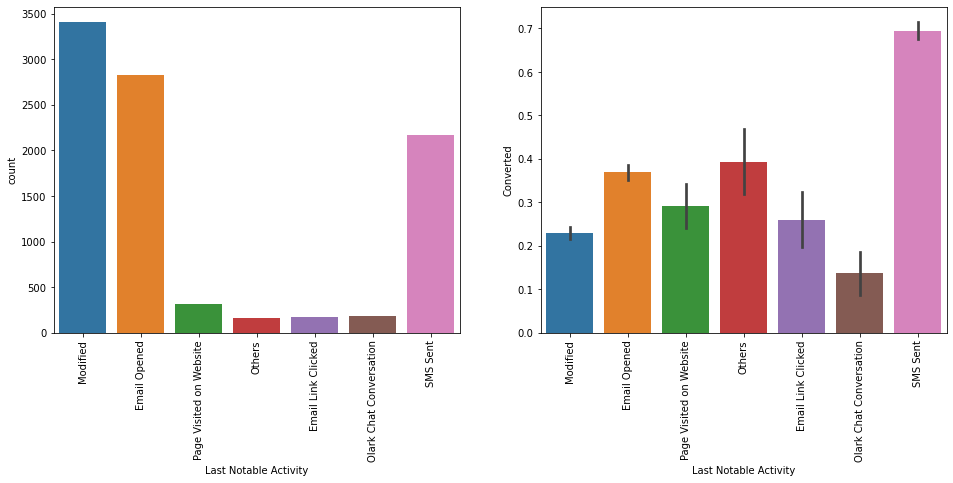

In [885]:
### Last Notable Activity
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.countplot(df_clean['Last Notable Activity'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_clean,x='Last Notable Activity',y='Converted')
plt.xticks(rotation=90)

plt.show()


#### Remarks: Modified has the maximum entry however, SMS sent has very high conversion rate.

### 4.2) Numerical Variable:

In [886]:
### Total Visits
print(df_clean.TotalVisits.describe(percentiles=[0,0.1,0.2,0.25,0.5,0.75,0.9,0.95,0.99,0.999,0.9999]))

count     9240.000000
mean         3.438636
std          4.819024
min          0.000000
0%           0.000000
10%          0.000000
20%          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
90%          7.000000
95%         10.000000
99%         17.000000
99.9%       31.522000
99.99%     149.371000
max        251.000000
Name: TotalVisits, dtype: float64


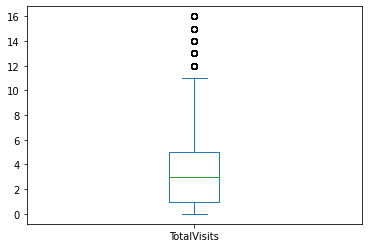

In [887]:
### There is outliers in this dataset. It is clearly visible from the above statistics. Median is 3. 
### For understanding the distributio
df_clean[df_clean.TotalVisits<df_clean.TotalVisits.quantile(0.99)].TotalVisits.plot.box()
plt.show()

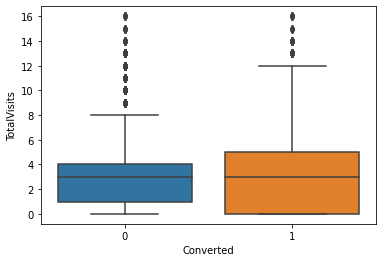

In [888]:
sns.boxplot(data=df_clean[df_clean.TotalVisits<df_clean.TotalVisits.quantile(0.99)],x='Converted',y='TotalVisits')
plt.show()

In [889]:
### creating temporary datadframe to understand more
Totalvisit=df_clean[['TotalVisits','Converted']]

In [890]:
Totalvisit['TotalVisits_bucket']=pd.qcut(Totalvisit.TotalVisits,[0,0.5,0.75,0.9,1],labels=['50th','75th','90th','100th'])

In [891]:
Totalvisit.TotalVisits_bucket.value_counts()

50th     5707
75th     1903
100th     855
90th      775
Name: TotalVisits_bucket, dtype: int64

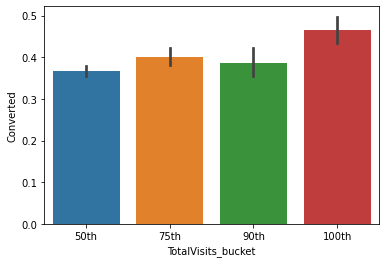

In [892]:
sns.barplot(data=Totalvisit,x='TotalVisits_bucket',y='Converted')
plt.show()

#### Remarks: As the total visits increasing rate of conversion is also increased. 

In [893]:
### Total Time Spent on Website             

In [894]:
print(df_clean['Total Time Spent on Website'].describe(percentiles=[0,0.1,0.2,0.25,0.5,0.75,0.9,0.95,0.99,0.999,0.9999]))

count     9240.000000
mean       487.698268
std        548.021466
min          0.000000
0%           0.000000
10%          0.000000
20%          0.000000
25%         12.000000
50%        248.000000
75%        936.000000
90%       1380.000000
95%       1562.000000
99%       1840.610000
99.9%     2115.805000
99.99%    2254.445900
max       2272.000000
Name: Total Time Spent on Website, dtype: float64


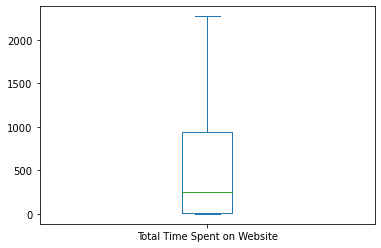

In [895]:
### It does not seem there is any outliers here
df_clean['Total Time Spent on Website'].plot.box()
plt.show()

In [896]:
### creating temporary datadframe to understand more
Total_time_spent=df_clean[['Total Time Spent on Website','Converted']]

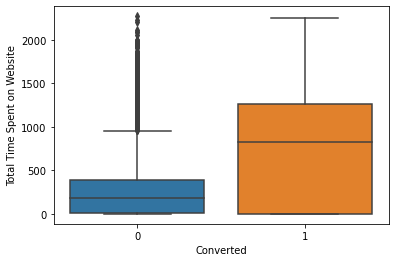

In [897]:
sns.boxplot(data=Total_time_spent,x='Converted',y='Total Time Spent on Website')
plt.show()

In [898]:
Total_time_spent['Timespent_bucket']=pd.qcut(Total_time_spent['Total Time Spent on Website'],[0,0.5,0.75,0.9,1],
                                            labels=['50th','75th','90th','100th'])

In [899]:
Total_time_spent['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [900]:
Total_time_spent.Timespent_bucket.value_counts()

50th     4622
75th     2310
90th     1387
100th     921
Name: Timespent_bucket, dtype: int64

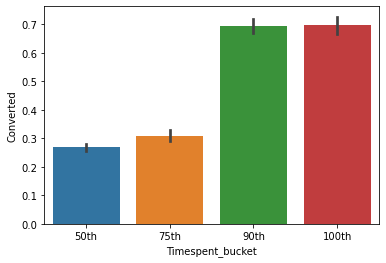

In [901]:
sns.barplot(data=Total_time_spent,x='Timespent_bucket',y='Converted')
plt.show()

#### Remarks: Here also it shows that as time spent increases the conversion rate increases.

In [902]:
### Page Views Per Visit
print(df_clean['Page Views Per Visit'].describe(percentiles=[0,0.1,0.2,0.25,0.5,0.75,0.9,0.95,0.99,0.999,0.9999]))

count     9240.000000
mean         2.357440
std          2.145781
min          0.000000
0%           0.000000
10%          0.000000
20%          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
90%          5.000000
95%          6.000000
99%          9.000000
99.9%       14.380500
99.99%      26.359100
max         55.000000
Name: Page Views Per Visit, dtype: float64


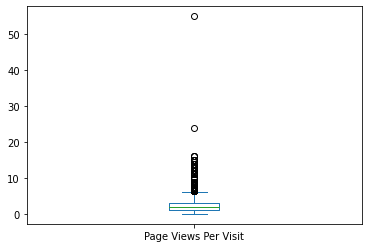

In [903]:
df_clean['Page Views Per Visit'].plot.box()
plt.show()

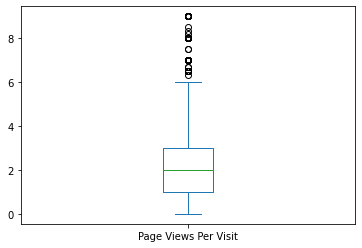

In [904]:
### Hence it is clear that Outliers are presnt too in this Column

df_clean[df_clean['Page Views Per Visit']<=9]['Page Views Per Visit'].plot.box()
plt.show()

In [905]:
### creating temporary datadframe to understand more
page_view=df_clean[['Page Views Per Visit','Converted']]

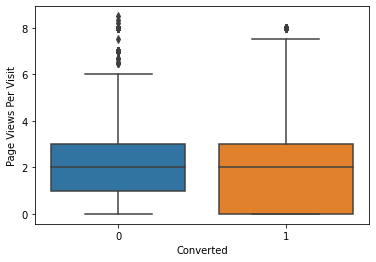

In [906]:
sns.boxplot(data=page_view[page_view['Page Views Per Visit']<page_view['Page Views Per Visit'].quantile(0.99)],x='Converted',y='Page Views Per Visit')
plt.show()

In [907]:
page_view['page_view_bucket']=pd.qcut(page_view['Page Views Per Visit'],[0,0.25,0.5,0.75,1],labels=['25th','50th','75th','100th'])

In [908]:
page_view.page_view_bucket.value_counts()

25th     2840
50th     2493
100th    2271
75th     1636
Name: page_view_bucket, dtype: int64

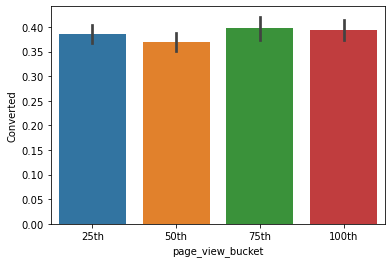

In [909]:
sns.barplot(data=page_view,x='page_view_bucket',y='Converted')
plt.show()

In [910]:
### Lets visualize correlation among numerical variables

num_vars=['TotalVisits','Page Views Per Visit','Total Time Spent on Website','Converted']

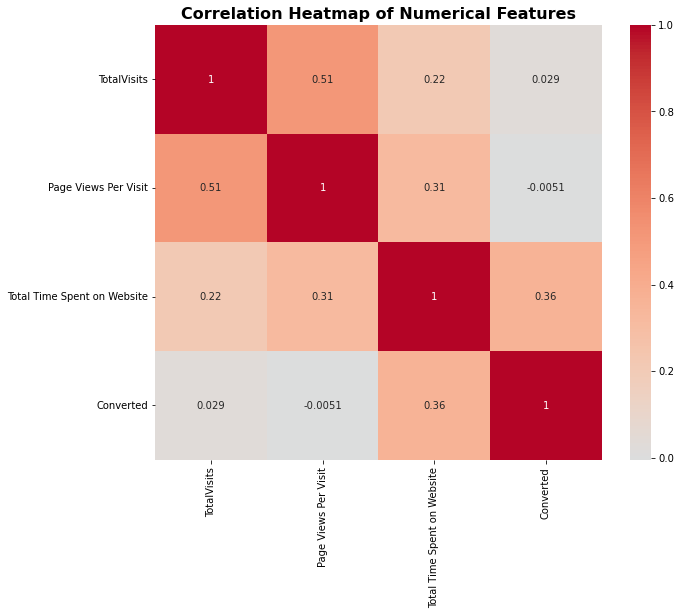

In [911]:
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight='bold')
sns.heatmap(df_clean[num_vars].corr(),annot=True, cmap='coolwarm', cbar=True, center=0)
plt.show()

#### Remarks: From the above analysis it is evident that there is strong positive correlation of Converted with Total Time Spent on Website. There is positive but moderate correlation of converted with Total Visits. Page Views per visit is very loosely negatively correlated with Converted.

## 5) Outlier Treatment:

In [912]:
df_clean.TotalVisits.describe(percentiles=[0.90,.99,.999,.9999,1])

count     9240.000000
mean         3.438636
std          4.819024
min          0.000000
50%          3.000000
90%          7.000000
99%         17.000000
99.9%       31.522000
99.99%     149.371000
100%       251.000000
max        251.000000
Name: TotalVisits, dtype: float64

In [913]:
### Let's remove entries beyond 32 from Total visit column and store the same in the database df_final

df_final_prev=df_clean[df_clean.TotalVisits<=32]

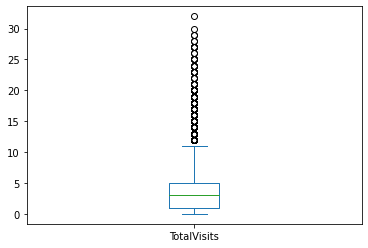

In [914]:
df_final_prev.TotalVisits.plot.box()
plt.show()

In [915]:
print(df_final_prev.shape)

### 9 rows are removed

(9231, 16)


In [916]:
### Page views per visit

df_final_prev['Page Views Per Visit'].describe(percentiles=(0.9,0.95,0.99,0.999,0.9999,1))

count     9231.00000
mean         2.34922
std          2.07142
min          0.00000
50%          2.00000
90%          5.00000
95%          6.00000
99%          9.00000
99.9%       14.00000
99.99%      16.61600
100%        24.00000
max         24.00000
Name: Page Views Per Visit, dtype: float64

In [917]:
##Let's remove the entries beyond 14.. However, here the entries are increasing gradually and We could have avoided the
## outlier treatment
df_final_prev=df_final_prev[df_final_prev['Page Views Per Visit']<=14]

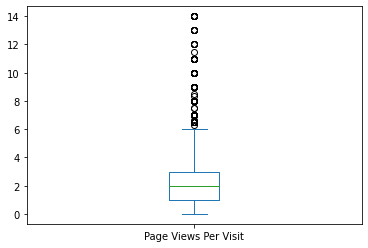

In [918]:
df_final_prev['Page Views Per Visit'].plot.box()
plt.show()

In [919]:
print(df_final_prev.shape)

### Total 18 rows have been removed

(9222, 16)


In [920]:
df_final_prev.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [921]:
#### Converting binary(yes/no) variable to 1/0
bin_list=['Do Not Email','A free copy of Mastering The Interview']
df_final_prev[bin_list]=df_final_prev[bin_list].apply(lambda x: x.map({'Yes':1,'No':0}))

In [922]:
df_final_prev.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


## 6) Dummy Variable Creation for Categorical variable:

In [923]:
#### Creating Dummy Variable:

col_list=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Occupation', 'Tags', 'City', 'Last Notable Activity']

In [924]:
## Let's look at the unique values for each column in col_list:
for column in col_list:
    unique_values = df_final_prev[column].unique()
    print(f'Unique values in column {column}: \n{unique_values}\n')

Unique values in column Lead Origin: 
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Unique values in column Lead Source: 
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'Facebook' 'Others']

Unique values in column Last Activity: 
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Others' 'SMS Sent']

Unique values in column Specialization: 
['Not Specified' 'Business Administration' 'Media and Advertising'
 'Management_Specialization' 'Travel and Tourism'
 'Banking, Investment And Insurance' 'Business_Specialization'
 'E-COMMERCE' 'Services Excellence']

Unique values in column Occupation: 
['Unemployed' 'Student' 'Not Specified' 'Working Professional' 'Other']

Unique values in column Tags: 
['Interested in other courses' 'Ringing'
 'Will revert after reading the email' 'N

In [925]:
### Lead origin

origin_dummy=pd.get_dummies(df_final_prev['Lead Origin'],prefix='Lead_Origin')
origin_dummy.drop('Lead_Origin_Quick Add Form',axis=1,inplace=True)

In [926]:
origin_dummy.head()

,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [927]:
### Lead Source
source_dummy=pd.get_dummies(df_final_prev['Lead Source'],prefix='Lead_Source')
source_dummy.drop('Lead_Source_Others',axis=1,inplace=True)

In [928]:
source_dummy.head()

,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [929]:
### Last Activity
last_activity_dummy=pd.get_dummies(df_final_prev['Last Activity'],prefix='Last_Activity')
last_activity_dummy.drop('Last_Activity_Others',axis=1,inplace=True)

In [930]:
last_activity_dummy.head()

,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable
0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0


In [931]:
### Specialization
Specialization_dummy=pd.get_dummies(df_final_prev['Specialization'],prefix='Specialization')
Specialization_dummy.drop('Specialization_Not Specified',axis=1,inplace=True)
Specialization_dummy.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Business_Specialization,Specialization_E-COMMERCE,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0


In [932]:
### Occupation

Occupation_dummy=pd.get_dummies(df_final_prev['Occupation'],prefix='Occupation')
Occupation_dummy.drop('Occupation_Other',axis=1,inplace=True)
Occupation_dummy.head()

,Occupation_Not Specified,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [933]:
### Tags
Tags_dummy=pd.get_dummies(df_final_prev['Tags'],prefix='Tags')
Tags_dummy.drop('Tags_Not Specified',axis=1,inplace=True)
Tags_dummy.head()

,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in other courses,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0


In [934]:
### City
City_dummy=pd.get_dummies(df_final_prev['City'],prefix='City')
City_dummy.drop('City_Not Specified',axis=1,inplace=True)
City_dummy.head()

,City_Mumbai,City_Outside Mumbai
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [935]:
### Last Notable Activity
Last_Notable_dummy=pd.get_dummies(df_final_prev['Last Notable Activity'],prefix='Last_Notable')
Last_Notable_dummy.drop('Last_Notable_Others',axis=1,inplace=True)
Last_Notable_dummy.head()

,Last_Notable_Email Link Clicked,Last_Notable_Email Opened,Last_Notable_Modified,Last_Notable_Olark Chat Conversation,Last_Notable_Page Visited on Website,Last_Notable_SMS Sent
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [936]:
### Concatening one by one

df_final_prev=pd.concat([df_final_prev,origin_dummy],axis=1)
df_final_prev=pd.concat([df_final_prev,source_dummy],axis=1)
df_final_prev=pd.concat([df_final_prev,last_activity_dummy],axis=1)
df_final_prev=pd.concat([df_final_prev,Specialization_dummy],axis=1)
df_final_prev=pd.concat([df_final_prev,Occupation_dummy],axis=1)
df_final_prev=pd.concat([df_final_prev,Tags_dummy],axis=1)
df_final_prev=pd.concat([df_final_prev,City_dummy],axis=1)
df_final_prev=pd.concat([df_final_prev,Last_Notable_dummy],axis=1)

In [937]:
#### Dropping original columns

df_final_prev.drop(col_list,axis=1,inplace=True)

In [938]:
df_final_prev.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Business_Specialization,Specialization_E-COMMERCE,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Not Specified,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in other courses,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,City_Mumbai,City_Outside Mumbai,Last_Notable_Email Link Clicked,Last_Notable_Email Opened,Last_Notable_Modified,Last_Notable_Olark Chat Conversation,Last_Notable_Page Visited on Website,Last_Notable_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [939]:
df_final=df_final_prev.drop(['Prospect ID','Lead Number'],axis=1)

In [940]:
# Computing the correlation matrix:
corr = df_final.corr()

# Generate a color map:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Apply the color map to the correlation matrix:
corr_colored = corr.style.background_gradient(cmap)

# Display the correlation matrix:
corr_colored

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Business_Specialization,Specialization_E-COMMERCE,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Not Specified,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in other courses,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,City_Mumbai,City_Outside Mumbai,Last_Notable_Email Link Clicked,Last_Notable_Email Opened,Last_Notable_Modified,Last_Notable_Olark Chat Conversation,Last_Notable_Page Visited on Website,Last_Notable_SMS Sent
Do Not Email,1.000000,-0.133849,-0.000844,-0.047275,0.016304,0.055354,-0.082094,0.092925,-0.020219,-0.017393,0.106308,-0.017895,-0.061170,-0.050264,0.036087,-0.037918,-0.012664,-0.000535,-0.062526,0.622626,-0.043229,-0.222999,-0.018508,-0.054340,0.072618,-0.016298,0.007165,-0.020385,0.004568,0.022155,0.030568,0.001901,0.000329,0.054291,0.060524,0.049665,0.006727,-0.020043,-0.049253,0.035982,-0.052446,-0.017463,-0.026835,0.065648,0.035651,-0.018370,-0.092508,0.048953,0.029802,0.025960,-0.037419,-0.187122,0.116742,-0.012673,0.043150,-0.024242
Converted,-0.133849,1.000000,0.046486,0.362946,-0.000517,-0.039787,-0.121805,-0.050390,0.321721,-0.023781,-0.080170,-0.022714,0.026098,-0.130014,-0.006533,0.270837,-0.031330,0.154165,-0.117672,-0.120360,-0.039873,-0.014210,-0.033489,-0.211112,-0.083056,0.325815,-0.010076,0.043902,0.025625,-0.003037,-0.005772,0.126749,0.009230,-0.015025,-0.009596,-0.326864,-0.004512,0.129037,0.313851,-0.179374,0.251256,-0.073183,-0.180488,-0.077353,-0.008254,-0.284031,0.644295,-0.073173,0.031600,0.046681,-0.035704,-0.022196,-0.244449,-0.072842,-0.035381,0.351986
TotalVisits,-0.000844,0.046486,1.000000,0.310216,0.673359,0.273348,-0.268347,0.390368,-0.226804,-0.043253,0.110894,-0.041541,0.166942,-0.428565,0.282833,-0.189982,0.072428,-0.106240,-0.093955,-0.060479,-0.026176,0.047512,0.021224,-0.189875,0.238016,0.007007,0.022232,0.075439,0.065880,0.075715,0.033386,0.199461,0.065282,0.025138,0.096360,-0.071428,-0.029347,0.070701,0.001133,-0.057975,0.026525,0.005988,-0.006001,0.040657,-0.007218,0.079895,0.046505,0.015589,0.246321,0.159596,-0.007984,0.067473,-0.141885,-0.049321,0.226338,0.006198
Total Time Spent on Website,-0.047275,0.362946,0.310216,1.000000,0.330025,0.168716,-0.201306,0.276149,-0.139640,-0.034910,0.133429,-0.032985,0.200508,-0.376911,0.095121,-0.107311,0.011453,-0.078540,-0.010421,-0.028447,-0.041284,0.020778,0.008222,-0.191461,0.027546,0.116586,0.004380,0.040522,0.053440,0.035988,0.000351,0.203912,0.039319,0.002946,0.042782,-0.151087,-0.012431,0.086449,0.099537,-0.072897,0.071487,-0.031931,-0.056059,0.020891,-0.003028,-0.056415,0.259513,-0.025577,0.169119,0.139869,-0.037060,0.010309,-0.107157,-0.051361,0.026920,0.124514
Page Views Per Visit,0.016304,-0.000517,0.673359,0.330025,1.000000,0.287122,-0.362013,0.508007,-0.273551,-0.050413,0.139879,-0.046567,0.216940,-0.523878,0.319301,-0.228843,0.082779,-0.126783,-0.064760,-0.037223,-0.037841,0.066094,0.013645,-0.238168,0.101239,0.07398

## 7) Model building:

### 7.1) Importing necessary libraries:

In [941]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score

### 7.2) Train-Test Splitting for Model Building:

In [942]:
#### Train-Test Split
y=df_final['Converted']
X=df_final.drop('Converted',axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [943]:
### Checking the shape of Train and Test dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6455, 55)
(6455,)
(2767, 55)
(2767,)


In [944]:
#### Scaling the three numerical variables
numerical_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler=StandardScaler()
X_train[numerical_vars]=scaler.fit_transform(X_train[numerical_vars])

In [945]:
X_train.head(3)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Business_Specialization,Specialization_E-COMMERCE,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Not Specified,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in other courses,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,City_Mumbai,City_Outside Mumbai,Last_Notable_Email Link Clicked,Last_Notable_Email Opened,Last_Notable_Modified,Last_Notable_Olark Chat Conversation,Last_Notable_Page Visited on Website,Last_Notable_SMS Sent
3907,0,0.198029,-0.675678,0.816280,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2178,0,0.499864,-0.715927,1.310225,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4269,0,1.405371,0.961751,2.792059,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 7.3) Feature Selection using RFE:

In [946]:
### Let's select (20 Features) for model buliding using RFE:
logreg=LogisticRegression()
rfe=RFE(estimator=logreg,n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [947]:
### Columns passed through RFE
cols=X_train.columns[rfe.support_]
print(list(cols))

['Do Not Email', 'Total Time Spent on Website', 'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website', 'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent', 'Specialization_Travel and Tourism', 'Occupation_Not Specified', 'Occupation_Working Professional', 'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Graduation in progress', 'Tags_Interested in other courses', 'Tags_Others', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Last_Notable_Modified', 'Last_Notable_SMS Sent']


In [948]:
### Model 1 with the 20 Features selected from RFE
X_train_sm=sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result1 = logm1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6455
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1423.5
Date:                Tue, 24 Jan 2023   Deviance:                       2847.0
Time:                        12:42:36   Pearson chi2:                 7.41e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5916
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3279      0.137     -2.392      0.017      -0.597      -0.059
Do Not Email                                -1.4523      0.222     -6.556      0.000      -1.887      -1.018
Total Time Spent on Website                  1.0977      0.056     19.546      0.000       0.988       1.208
Lead_Origin_Lead Add Form                    1.3923      0.310      4.490      0.000       0.785       2.000
Lead_Source_Olark Chat                       1.3266      0.144      9.232      0.000       1.045       1.608
Lead_Source_Welingak Website                 3.2705      0.794      4.121      0.000       1.715       4.826
Last_Activity_Olark Chat Conversation       -1.1004      0.222     -4.952      0.000      -1.536      -0.665
Last_Activity_SMS Sent                       0.8496      0.207      4.106      0.000       0.444       1.255
Specialization_Travel and Tourism           -1.1494      0.381     -3.016      0.003      -1.896      -0.402
Occupation_Not Specified                    -1.8496      0.140    -13.191      0.000      -2.124      -1.575
Occupation_Working Professional              0.7107      0.302      2.353      0.019       0.119       1.303
Tags_Already a student                      -4.6031      0.609     -7.562      0.000      -5.796      -3.410
Tags_Closed by Horizzon                      4.7477      0.736      6.455      0.000       3.306       6.189
Tags_Graduation in progress                 -2.2261      0.511     -4.353      0.000      -3.228      -1.224
Tags_Interested in other courses            -3.1986      0.356     -8.983      0.000      -3.896      -2.501
Tags_Others                                 -0.9383      0.153     -6.118      0.000      -1.239      -0.638
Tags_Ringing                                -4.4069      0.253    -17.421      0.000      -4.903      -3.911
Tags_Will revert after reading the email     2.9415      0.208     14.149      0.000       2.534       3.349
Tags_invalid number                         -4.2583      1.062     -4.009      0.000      -6.340      -2.177
Last_Notable_Modified                       -0.6211      0.136     -4.579      0.000      -0.887      -0.355
Last_Notable_SMS Sent                        0.9075      0.239      3.793      0.000       0.439       1.376
============================================================================================================
"""

#### Remarks: P-score of most of the features are very less. Let's Check the VIF score.

In [949]:
### Code to calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last_Notable_SMS Sent,6.54
6,Last_Activity_SMS Sent,6.35
18,Last_Notable_Modified,2.51
16,Tags_Will revert after reading the email,1.91
2,Lead_Origin_Lead Add Form,1.84
3,Lead_Source_Olark Chat,1.70
5,Last_Activity_Olark Chat Conversation,1.59
8,Occupation_Not Specified,1.58
1,Total Time Spent on Website,1.37
11,Tags_Closed by Horizzon,1.35


In [950]:
### Based upon the VIF score lets remove Last_Notable_SMS Sent and check
cols=cols.drop('Last_Notable_SMS Sent')

In [951]:
### Model 2 with the 20 Features selected from RFE
X_train_sm=sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result2 = logm2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6455
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1430.9
Date:                Tue, 24 Jan 2023   Deviance:                       2861.7
Time:                        12:42:36   Pearson chi2:                 7.40e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5906
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.2486      0.135     -1.840      0.066      -0.513       0.016
Do Not Email                                -1.4167      0.222     -6.383      0.000      -1.852      -0.982
Total Time Spent on Website                  1.0984      0.056     19.577      0.000       0.988       1.208
Lead_Origin_Lead Add Form                    1.3907      0.311      4.475      0.000       0.782       2.000
Lead_Source_Olark Chat                       1.3295      0.143      9.289      0.000       1.049       1.610
Lead_Source_Welingak Website                 3.2405      0.794      4.081      0.000       1.684       4.797
Last_Activity_Olark Chat Conversation       -0.9706      0.220     -4.403      0.000      -1.403      -0.539
Last_Activity_SMS Sent                       1.5179      0.107     14.212      0.000       1.309       1.727
Specialization_Travel and Tourism           -1.1408      0.378     -3.019      0.003      -1.881      -0.400
Occupation_Not Specified                    -1.8735      0.139    -13.445      0.000      -2.147      -1.600
Occupation_Working Professional              0.6760      0.304      2.225      0.026       0.080       1.272
Tags_Already a student                      -4.6580      0.609     -7.644      0.000      -5.852      -3.464
Tags_Closed by Horizzon                      4.8604      0.736      6.602      0.000       3.417       6.303
Tags_Graduation in progress                 -2.2308      0.509     -4.381      0.000      -3.229      -1.233
Tags_Interested in other courses            -3.1795      0.357     -8.904      0.000      -3.879      -2.480
Tags_Others                                 -0.9065      0.152     -5.952      0.000      -1.205      -0.608
Tags_Ringing                                -4.3347      0.250    -17.336      0.000      -4.825      -3.845
Tags_Will revert after reading the email     2.9705      0.209     14.234      0.000       2.561       3.380
Tags_invalid number                         -4.1538      1.057     -3.928      0.000      -6.226      -2.081
Last_Notable_Modified                       -0.9224      0.113     -8.194      0.000      -1.143      -0.702
============================================================================================================
"""

In [952]:
### Code to calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last_Notable_Modified,1.99
16,Tags_Will revert after reading the email,1.85
2,Lead_Origin_Lead Add Form,1.83
3,Lead_Source_Olark Chat,1.70
6,Last_Activity_SMS Sent,1.58
8,Occupation_Not Specified,1.57
5,Last_Activity_Olark Chat Conversation,1.55
1,Total Time Spent on Website,1.37
11,Tags_Closed by Horizzon,1.34
9,Occupation_Working Professional,1.34


#### VIF scores are also under the limits. Let's go for Prediction

### 7.4) Prediction on training data:

In [953]:
y_train_pred=result2.predict(X_train_sm)
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred_df=pd.DataFrame({'Converted':y_train.values,'Predicted_Prob':y_train_pred})
y_train_pred_df['Prospect_ID']=y_train.index
y_train_pred_df['Predicted']=y_train_pred_df['Predicted_Prob'].apply(lambda x: 1 if x>0.5 else 0) 
### Taking a threshold of 0.5
y_train_pred_df.head()

,Converted,Predicted_Prob,Prospect_ID,Predicted
0,1,0.970621,3907,1
1,0,0.090058,2178,0
2,1,0.611146,4269,1
3,1,0.992970,8886,1
4,1,0.696059,8107,1


#### Metrices

In [954]:
### Confusin Matrix
confusion_mat=confusion_matrix(y_train_pred_df.Converted,y_train_pred_df.Predicted)
print(confusion_mat)

[[3739  206]
 [ 359 2151]]


In [955]:
#### Accuracy
print(metrics.accuracy_score(y_train_pred_df.Converted,y_train_pred_df.Predicted))

0.9124709527498064


In [956]:
### Different Features of Confusion Matrix 

TP = confusion_mat[1,1] # true positive 
TN = confusion_mat[0,0] # true negatives
FP = confusion_mat[0,1] # false positives
FN = confusion_mat[1,0] # false negatives

In [957]:
### Sensitivity
print(TP/(TP+FN))

0.8569721115537848


In [958]:
### Specificity
print(TN/(TN+FP))

0.9477820025348542


#### Optimizing the Threshold with ROC curve:

In [959]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [960]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_df.Converted, y_train_pred_df.Predicted_Prob,
                                         drop_intermediate = False)

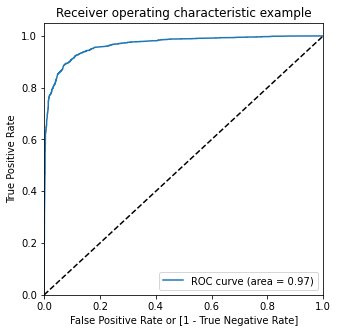

In [961]:
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Predicted_Prob)

In [962]:
### Finding Optimal Cut off points
cuts=[x/float(10) for x in range(10)]

In [963]:
for i in cuts:
    y_train_pred_df[i]=y_train_pred_df.Predicted_Prob.apply(lambda x: 1 if x>i else 0)

In [964]:
y_train_pred_df.head()

,Converted,Predicted_Prob,Prospect_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.970621,3907,1,1,1,1,1,1,1,1,1,1,1
1,0,0.090058,2178,0,1,0,0,0,0,0,0,0,0,0
2,1,0.611146,4269,1,1,1,1,1,1,1,1,0,0,0
3,1,0.992970,8886,1,1,1,1,1,1,1,1,1,1,1
4,1,0.696059,8107,1,1,1,1,1,1,1,1,0,0,0


In [965]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
roc_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in cuts:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    roc_df.loc[i] =[ i ,accuracy,sensi,speci]
print(roc_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388846  1.000000  0.000000
0.1   0.1  0.821534  0.971315  0.726236
0.2   0.2  0.887839  0.939044  0.855260
0.3   0.3  0.902711  0.914343  0.895311
0.4   0.4  0.911077  0.890837  0.923954
0.5   0.5  0.912471  0.856972  0.947782
0.6   0.6  0.904570  0.815936  0.960963
0.7   0.7  0.900697  0.786853  0.973131
0.8   0.8  0.895585  0.757371  0.983523
0.9   0.9  0.869868  0.681673  0.989607


<Figure size 3600x864 with 0 Axes>

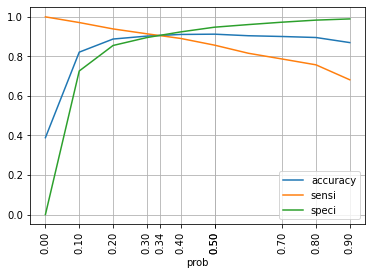

In [966]:
plt.figure(figsize=[50,12])
roc_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks([0,0.1,0.2,0.3,0.34,0.4,0.5,0.5,0.7,0.8,0.9])
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### 0.34 seems to be decent threshold. Let's predict now.

In [967]:
y_train_pred=result2.predict(X_train_sm)
y_train_pred=y_train_pred.values.reshape(-1)
y_train_final_df=pd.DataFrame({'Converted':y_train.values,'Predicted_Prob':y_train_pred})
y_train_final_df['Prospect_ID']=y_train.index
y_train_final_df['Predicted']=y_train_final_df['Predicted_Prob'].apply(lambda x: 1 if x>0.34 else 0) 
### Taking a threshold of 0.34
y_train_final_df.head()

,Converted,Predicted_Prob,Prospect_ID,Predicted
0,1,0.970621,3907,1
1,0,0.090058,2178,0
2,1,0.611146,4269,1
3,1,0.992970,8886,1
4,1,0.696059,8107,1


In [968]:
### Confusin Matrix
cm_train_final=confusion_matrix(y_train_final_df.Converted,y_train_final_df.Predicted)
print(cm_train_final)

[[3589  356]
 [ 250 2260]]


In [969]:
#### Accuracy
print(metrics.accuracy_score(y_train_final_df.Converted,y_train_final_df.Predicted))

0.9061192873741286


In [970]:
### Different aspects of Confusion Matrix
TP_train = cm_train_final[1,1] # true positive 
TN_train = cm_train_final[0,0] # true negatives
FP_train = cm_train_final[0,1] # false positives
FN_train = cm_train_final[1,0] # false negatives

In [971]:
### Sensitivity
print(TP_train/(TP_train+FN_train))

0.900398406374502


In [972]:
### Specificity
print(TN_train/(TN_train+FP_train))

0.9097591888466413


In [973]:
### Recall & Precision
print('Precision_Score_',precision_score(y_train_final_df.Converted,y_train_final_df.Predicted))
print('Recall_Score_',recall_score(y_train_final_df.Converted,y_train_final_df.Predicted))

Precision_Score_ 0.863914373088685
Recall_Score_ 0.900398406374502


### 7.5) Precision and Recall Trade-Off:

In [974]:
p, r, thresholds = precision_recall_curve(y_train_final_df.Converted, y_train_final_df.Predicted_Prob)

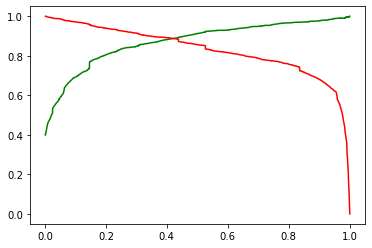

In [975]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 7.6) Prediction on Test data:

In [976]:
numerical_vars

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [977]:
X_test[numerical_vars]=scaler.transform(X_test[numerical_vars])

In [978]:
X_test_sm=sm.add_constant(X_test[cols])

In [979]:
y_test_pred=result2.predict(X_test_sm)
y_test_pred=y_test_pred.values.reshape(-1)
y_test_final_df=pd.DataFrame({'Converted':y_test.values,'Predicted_Prob':y_test_pred})
y_test_final_df['Prospect_ID']=y_test.index
y_test_final_df['Predicted']=y_test_final_df['Predicted_Prob'].apply(lambda x: 1 if x>0.34 else 0) 

### Taking a threshold of 0.34
y_test_final_df.head()

,Converted,Predicted_Prob,Prospect_ID,Predicted
0,1,0.526404,1752,1
1,1,0.248391,4861,0
2,0,0.021256,5040,0
3,0,0.002233,4887,0
4,0,0.104504,6855,0


In [980]:
### Confusin Matrix
cm_test_final=confusion_matrix(y_test_final_df.Converted,y_test_final_df.Predicted)
print(cm_test_final)

[[1558  161]
 [  85  963]]


In [981]:
#### Accuracy
print(metrics.accuracy_score(y_test_final_df.Converted,y_test_final_df.Predicted))

0.9110950487893025


In [982]:
### Different aspects of Confusion Matrix
TP_test = cm_test_final[1,1] # true positive 
TN_test = cm_test_final[0,0] # true negatives
FP_test = cm_test_final[0,1] # false positives
FN_test = cm_test_final[1,0] # false negatives

In [983]:
### Sensitivity
print(TP_test/(TP_test+FN_test))

0.9188931297709924


In [984]:
### Specificity
print(TN_test/(TN_test+FP_test))

0.9063408958696917


In [985]:
### Recall & Precision
print('Precision_Score_',precision_score(y_test_final_df.Converted,y_test_final_df.Predicted))
print('Recall_Score_',recall_score(y_test_final_df.Converted,y_test_final_df.Predicted))

Precision_Score_ 0.8567615658362989
Recall_Score_ 0.9188931297709924


#### Remarks: Train and Test data metrics are almost in the similar range.

In [986]:
coeff=abs(result2.params)

In [987]:
print(coeff.sort_values(ascending=False))

Tags_Closed by Horizzon                     4.860434
Tags_Already a student                      4.657971
Tags_Ringing                                4.334721
Tags_invalid number                         4.153807
Lead_Source_Welingak Website                3.240504
Tags_Interested in other courses            3.179493
Tags_Will revert after reading the email    2.970490
Tags_Graduation in progress                 2.230812
Occupation_Not Specified                    1.873516
Last_Activity_SMS Sent                      1.517864
Do Not Email                                1.416682
Lead_Origin_Lead Add Form                   1.390728
Lead_Source_Olark Chat                      1.329500
Specialization_Travel and Tourism           1.140767
Total Time Spent on Website                 1.098350
Last_Activity_Olark Chat Conversation       0.970616
Last_Notable_Modified                       0.922385
Tags_Others                                 0.906512
Occupation_Working Professional             0.

##### Top 5 Imapctful Features
- Tags_Closed by Horizzon                    
- Tags_Already a student                      
- Tags_Ringing                                
- Tags_invalid number                         
- Lead_Source_Welingak Website                

##### Train Data Parameters
-  Accuracy:0.9061192873741286
-  Precision:0.863914373088685
-  Recall:0.900398406374502

##### Test Data 
-  Accuracy:0.9110950487893025
-  Precision:0.8567615658362989
-  Recall:0.9188931297709924

#### Adding Lead Score (Probablity multiplied by 100) to Database

In [988]:
numerical_vars

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [989]:
df_final_prev[numerical_vars]=scaler.transform(df_final_prev[numerical_vars])

In [990]:
df_final_prev['Pred_prob']=result2.predict(sm.add_constant(df_final_prev[cols]))
df_final_prev['Lead_Score']=round(df_final_prev.Pred_prob*100,2)

In [991]:
df_final_prev[['Lead Number','Converted', 'Pred_prob','Lead_Score']].head()

,Lead Number,Converted,Pred_prob,Lead_Score
0,660737,0,0.018054,1.81
1,660728,0,0.014714,1.47
2,660727,1,0.992039,99.20
3,660719,0,0.002821,0.28
4,660681,1,0.975727,97.57


- Conclusions:
 - The Above Dataframe Contains the Lead Score against each Lead Number
 - It will Surely help X education to identify potenatial Leads for Conversion.

In [992]:
###END###